In [690]:
import numpy
import numpy as np
import pandas as pd
import pandas
import math
import scipy.stats
import seaborn as sns
import tensorflow as tf
import keras
import keras.backend as k

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [275]:
df = pd.read_csv('Combined_Data_for_model_final_2.csv')
df.head()

,Unnamed: 0,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,0,2016-01-01 00:15:00,4099.37,11.0,7.0,76.36,0.0,0.0,27.4,1.0
1,1,2016-01-01 00:30:00,3995.64,11.0,7.0,76.36,0.0,0.0,27.4,1.0
2,2,2016-01-01 00:45:00,3954.80,11.0,7.0,76.36,0.0,0.0,27.4,1.0
3,3,2016-01-01 01:00:00,3904.93,11.0,8.0,81.75,0.0,0.0,27.4,1.0
4,4,2016-01-01 01:15:00,3654.68,11.0,8.0,81.75,0.0,0.0,27.4,1.0


In [276]:
df1=df.drop(columns= 'Unnamed: 0')
df1

,Date,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
0,2016-01-01 00:15:00,4099.37,11.0,7.0,76.36,0.0,0.0,27.4,1.0
1,2016-01-01 00:30:00,3995.64,11.0,7.0,76.36,0.0,0.0,27.4,1.0
2,2016-01-01 00:45:00,3954.80,11.0,7.0,76.36,0.0,0.0,27.4,1.0
3,2016-01-01 01:00:00,3904.93,11.0,8.0,81.75,0.0,0.0,27.4,1.0
4,2016-01-01 01:15:00,3654.68,11.0,8.0,81.75,0.0,0.0,27.4,1.0
...,...,...,...,...,...,...,...,...,...
210426,2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0
210427,2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210428,2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3
210429,2021-12-31 23:30:00,4510.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3


In [277]:
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15)) #Check last few dates. 

210416   2021-12-31 20:15:00
210417   2021-12-31 20:30:00
210418   2021-12-31 20:45:00
210419   2021-12-31 21:00:00
210420   2021-12-31 21:15:00
210421   2021-12-31 21:30:00
210422   2021-12-31 21:45:00
210423   2021-12-31 22:00:00
210424   2021-12-31 22:15:00
210425   2021-12-31 22:30:00
210426   2021-12-31 22:45:00
210427   2021-12-31 23:00:00
210428   2021-12-31 23:15:00
210429   2021-12-31 23:30:00
210430   2021-12-31 23:45:00
Name: Date, dtype: datetime64[ns]


In [278]:
#Variables for training
#cols = list(df1)[1:9]
#Date and volume columns are not used in training. 
#print(cols) 

['Haryana Load (MW)', 'temp', 'dew', 'humidity', 'windspeed', 'winddir', 'cloudcover', 'visibility']


In [640]:
#New dataframe with only training data - 8 columns
#df1_for_training = df[cols].astype(np.float32)
df1_for_training = df1.set_index(['Date'])

In [641]:
df1_for_training

,Haryana Load (MW),temp,dew,humidity,windspeed,winddir,cloudcover,visibility
Date,,,,,,,,
2016-01-01 00:15:00,4099.37,11.0,7.0,76.36,0.0,0.0,27.4,1.0
2016-01-01 00:30:00,3995.64,11.0,7.0,76.36,0.0,0.0,27.4,1.0
2016-01-01 00:45:00,3954.80,11.0,7.0,76.36,0.0,0.0,27.4,1.0
2016-01-01 01:00:00,3904.93,11.0,8.0,81.75,0.0,0.0,27.4,1.0
2016-01-01 01:15:00,3654.68,11.0,8.0,81.75,0.0,0.0,27.4,1.0
...,...,...,...,...,...,...,...,...
2021-12-31 22:45:00,4712.55,10.0,8.0,87.38,0.0,0.0,27.4,2.0
2021-12-31 23:00:00,4649.58,9.2,7.3,88.04,0.0,0.0,28.5,1.3
2021-12-31 23:15:00,4571.39,9.2,7.3,88.04,0.0,0.0,28.5,1.3


In [657]:
# Split train data and test data
train_size = round(len(df1_for_training)*0.70)

# train_data = df.WC.loc[:train_size] -----> it gives a series
# Do not forget use iloc to select a number of rows
train_data = df1_for_training.iloc[:train_size]
test_data = df1_for_training.iloc[train_size:]
test_dates = test_data.index

In [643]:
#train_data.shape
Y_df = train_data.iloc[:,0]
X_df = train_data.drop(columns=['Haryana Load (MW)'])
#test data
Y = test_data.iloc[:,0]
test_df = test_data.drop(columns = ['Haryana Load (MW)'])
test_df.shape

(63129, 7)

In [644]:
scaler = MinMaxScaler()

#train_scaled = scaler.transform(X_df)
#test_scaled = scaler.transform(test_df)
#Y_train, Y_test
X_train = numpy.reshape(scaler.fit_transform(X_df), 
                        (X_df.shape[0],1, X_df.shape[1]))
X_test = numpy.reshape(scaler.fit_transform(test_df), 
                       (test_df.shape[0], 1, test_df.shape[1]))
Y_train = scaler.fit_transform(Y_df.values.reshape(Y_df.shape[0],1))
Y_test = scaler.fit_transform(Y.values.reshape(Y.shape[0],1))
#Y_train = Y_train.reshape(1,Y_df.shape[0])

array([[0.30849792],
       [0.30702058],
       [0.30080262],
       ...,
       [0.30094257],
       [0.29528903],
       [0.28968646]])

In [284]:
# # Create input dataset
# # Th input shape should be [samples, time steps, features]
# def create_dataset (X, look_back = 1):
#     Xs, ys = [], []
    
#     for i in range(len(X)-look_back):
#         v = X[i:i+look_back]
#         Xs.append(v)
#         ys.append(X[i+look_back])
        
#     return np.array(Xs), np.array(ys)
# # look_back = 1
# # X_train, y_train = create_dataset(train_scaled,look_back)
# # X_test, y_test = create_dataset(test_scaled,look_back)

# print('X_train.shape: ', X_train.shape)
# print('y_train.shape: ', y_train.shape)
# print('X_test.shape: ', X_test.shape) 
# print('y_test.shape: ', y_test.shape)

In [645]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', Y_train.shape)
print('X_test.shape: ', Y_test.shape)
print()
#print('y_test.shape: ', y_test.shape)

X_train.shape:  (147302, 1, 7)
y_train.shape:  (147302, 1)
X_test.shape:  (63129, 1)



In [646]:
from keras.callbacks import EarlyStopping
import time

In [647]:
# create and fit the LSTM network
#units is number of hidden layers
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(Y_train.shape[1]))
# model.add(LSTM(200, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(60, activation='relu'))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(1, activation='linear'))


def root_mean_squared_error(y_true, y_pred):
        return k.sqrt(k.mean(k.square(y_pred - y_true))) 

model.compile(loss = root_mean_squared_error, optimizer='ADAM')
start = time.time()
hist =model.fit(X_train, Y_train, epochs=8, shuffle=True,batch_size=125, validation_data= (X_test, Y_test),
                #callbacks=[EarlyStopping(monitor='val_loss', patience=30)], 
                verbose=1)

end = time.time()
# Training Phase
model.summary()

Epoch 1/8
1179/1179 [==============================] - 12s 8ms/step - loss: 0.1218 - val_loss: 0.1248
Epoch 2/8
1179/1179 [==============================] - 8s 7ms/step - loss: 0.0948 - val_loss: 0.1266
Epoch 3/8
1179/1179 [==============================] - 9s 7ms/step - loss: 0.0921 - val_loss: 0.1237
Epoch 4/8
1179/1179 [==============================] - 8s 7ms/step - loss: 0.0916 - val_loss: 0.1259
Epoch 5/8
1179/1179 [==============================] - 8s 7ms/step - loss: 0.0912 - val_loss: 0.1255
Epoch 6/8
1179/1179 [==============================] - 9s 7ms/step - loss: 0.0908 - val_loss: 0.1272
Epoch 7/8
1179/1179 [==============================] - 9s 8ms/step - loss: 0.0907 - val_loss: 0.1277
Epoch 8/8
1179/1179 [==============================] - 9s 8ms/step - loss: 0.0905 - val_loss: 0.1264
Model: "sequential_64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_77 (LSTM)              (None, 

In [625]:
pred=model.predict(X_test)

In [662]:
#plt.plot(pred)
#plt.plot(Y_test, alpha=0.6)
#plt.scatter(pred, Y_test)
data = pd.DataFrame({'actual':Y_test.T.reshape(pred.shape[0]),
                     'Pred':pred.T.reshape(pred.shape[0])})
data=data.set_index(test_dates)
# sns.jointplot(data=data, x="Pred", y="actual")

In [663]:
print('Mean Absolute Error Train:', mean_absolute_error(Y_test, pred))
print('Mean Squared Error Train:',np.sqrt(mean_squared_error(Y_test, pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(Y_test, pred))
print('Mean Absolute Error Test:', mean_absolute_error(Y_test, pred))
print('Mean Squared Error Test:',np.sqrt(mean_squared_error(Y_test, pred)))
print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(Y_test, pred))

Mean Absolute Error Train: 0.1099260824202692
Mean Squared Error Train: 0.14434022817460904
Mean Absolute Percentage Error: 21621379132.990646
Mean Absolute Error Test: 0.1099260824202692
Mean Squared Error Test: 0.14434022817460904
Mean Absolute Percentage Error: 21621379132.990646


In [671]:
data.index[100]

'2020-03-15 10:45:00'

In [664]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    se = scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return h

bounds = data['actual'].rolling(500).apply(lambda x:mean_confidence_interval(x))
mean = data['actual'].rolling(500).mean()
mean_pred = data['Pred'].rolling(500).mean()
lower_bound = mean - bounds
upper_bound = mean + bounds

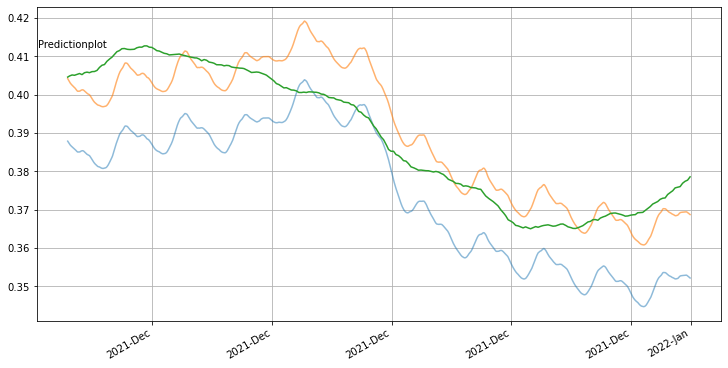

In [705]:
fig, ax = plt.subplots(figsize=(10, 5), constrained_layout=True )
date = pd.to_datetime(data.index[-1000:].tolist())

ax.plot(date ,lower_bound[-1000:], alpha=0.5)
ax.plot(date, upper_bound[-1000:], alpha=0.6)
ax.plot(date, mean_pred[-1000:])
ax.grid(True)
ax.set_title('Predictionplot',loc ='left', y=0.85, 
             x=0.002, fontsize='medium')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')

#plt.plot(pd.Series(pred.T.reshape(pred.shape[0]))[-100:])
#plt.plot(mean_pred[-1000:])
#plt.show()